# Modelo Perceptron

El perceptrón es un algortimo de clasificador de *aprendizaje supervisado, determinista y a posteriori.*

## Conceptos previo
Antes de describir el algoritmo de aprendizaje tenemos que enteder:

- https://youtu.be/MRIv2IwFTPg (Video acerca de la neurona)


**Keywords:** Regresion Lineal, minimos cuadrados, interpolación

**Regresion lineal**. Es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente

**Método de minimos cuadrados**. Permite hayar un linea recta que resumen con dos variables cuantitativas X, Y.

**Interpolación**. Obtención de nuevos puntos partiendo del conocimiento de un conjunto de puntos.

<img src="./img/perceptron/1.png" alt="drawing" width="50%" style="float: left"/>
<img src="./img/perceptron/2.png" alt="drawing" width="50%" style="float: right"/>

Tendremos un conjunto de entradas $x_1, x_2, x_3, \dots , x_n$ que simulan las señales que entran por la dentritas, en el modelo del peceptron defineremos una serie de pesos $w_1, w_2, \dots, w_n$ por cada entrada. La idea básica es definir un algoritmo que aprende los valores de los pesos $w$ que serán multiplicados con las características de entrada para poder decidir si la neurona dispara o no. (Es cuando la función de activacion es evaluada)

Al final obtendremos una combinacional lineal de los pesos con las entradas, esto representará una ecuación lineal:

$$
y = w_1 x_2 + w_2 x_2 + \dots + w_n x_n
$$

<img src="img/perceptron/3.png" width="60%">

###  Función de activación
El último paso para enteder el modelo, es conocer la función de activacion que sera una función que transformará nuestra ecuación lineal, este paso es la clave para la clasificación en clases, dependiendo la función de activacion podremos seperar clases.

Para nuestro ejemplo, utilizaremos la función de activación más simple que será la función escalón unitario o función escalon Heaviside:

\begin{align*} 
  f(z)=\left\{
    \begin{array}{ll}
      1,  & \mbox{if $z \geq \theta$}.\\
      -1, & \mbox{otherwise}.
    \end{array}
  \right.
\end{align*}

$$
z = w_1 x_2 + w_2 x_2 + \dots + w_n x_n \\
\theta = umbral
$$

Esto nos transformara nuestra ecuacion lineal y obtendremos una clasificacion binaria tal que tendremos dos clases  la clase positiva y negativa que representa 1 y -1.


*Un umbral (o sesgo), permite indicar cuándo debe reaccionar la neurona.*


<img src="./img/perceptron/4.png" alt="drawing" width="50%"/>

La idea tras del preceptrón de umbral es simular
el funcionamiento de una célula en el cerebro: dispara o no. En resumen: un perceptrón recibe
múltiples señales de entrada y, si la suma de las señales de entrada (multiplicadas por el peso
respectivo) sobrepasa cierto umbral, entrega una señal, si no pasa el umbral, queda en silencio. La idea consiste que si pasa el umbral pertenece a cierta clase.

Este es el primer algoritmo de aprendizaje de máquina, dada la idea de Frank Rosenblatt,
conocida como regla de aprendizaje: el perceptrón aprenderá los pesos para cada señal de entrada
para poder **dibujar un límite de decisión que nos permita discriminar entre dos clases linealmente
separables**.

A igual que con la regresión lineal y la regresión logística, la principal dificultad será el aprendizaje de los pesos (y del umbral, que puede verse como un peso particular). 

<img src="./img/perceptron/6.png" alt="drawing" width="70%"/>

Agregaremos ademas algo que se llama *bias* que es el sesgo que no ayudara ajustar nuestra grafica, nos ayuda para evitar un problema llamado sobreajuste.
$b=sesgo$\
$\theta$=umbral


$$b = w_0 x_0$$
$$
w_0 = \theta \\
x_0 = 1
$$

$$
z = w_0x_0 + w_1 x_2 + w_2 x_2 + \dots + w_n x_n 
$$

<img src="./img/perceptron/7.png" alt="drawing" width="70%"/>

Tenemos un sesgo para evitar el sobre ajuste

Ver: 
- https://www.asimovinstitute.org/neural-network-zoo/ (zoologico de las redes neuronales)

## Actualizacion de los pesos
En cada iteracion tendremos que actualizar los pesos, esto se le conoce como **epoca**, el numero de iteraciones las dara el usuario, cuando veamos que los pesos convergen a un valor (esto es cuando ya no hay errores) significa que son los valores que al evaluarlos en cada una de las muestras nos dara el valor esperado, u otra manera de decirlo nos da la clase que corresponde.

![](img/perceptron/aux1.png)

$$w_j = wj + \Delta w_j x^{(i)}_j$$

$y^{(i)} = $ Es el valor esperado o catagoria a la que pertenece (1,-1).\
$\hat{y}^{(i)} = f(z) = $ La funcion de activación al evaluar el producto punto de los pesos y las entradas.

Una observacion, es que si el valor de la funcion activacion corresponde con el valor esperado(valor de clase) la diferencia dara $0$ y por lo tanto no habra actualizar los pesos porque la multiplicacion daria $0$ y al sumar $w_j + 0$ es cero.

En caso contrario, tendremos un $\Delta w$ y a la vez guardaremos que hubo un error en una lista de errores por cada itaración.

En codigo seria esta parte:

In [ ]:
"""
xi
[0,0], 
[0,1], 
[1,0],
[1,1]
predict - predice el perceptrón en el paso actual (funcion activacion, en esta caso funcion escalon 1 a -1)
"""
for xi, yi in zip(X, y):
    # Calculamos nuestra actualización dw=update            
    update = self.eta * (yi - self.predict(xi))
    # Actualizacion de los pesos (producto vectorizado con numpy)
    self.w_[1:] += update * xi 
    # x_0 = 1
    self.w_[0] += update * 1  

### Regla de aprendizaje
1. Inicializar los pesos a 0 o un numero aleatorio pequeño
1. Para cada muestra de entrenamiento $x^{(i)}$:
    1. Calcular el valor de salida $\hat{y}^{(i)}$
    1. Actualizar pesos.

Dado que nuestro perceptron solo puede clasificar entre $2$ clases, es decir, es 0 o 1, blanco o negro, esta o no esta. Podremos seperar solo problemas donde tengamos 2 respuestas, con esta observación vemos que se comporta como el sistema binario que conocemos, por lo tanto podemos simular compuertas logicas.

Nosotros tenemos que darle significa al 0 y al 1.

Implementando el perceptron

In [5]:
import numpy as np

# Algoritmo supervisado
class Perceptron(object):
    """La creacion de un perceptron, realiza el algortimo del perceptron de aprendisaje
    Se actualiza de esta forma
    
    Actualizacion
    wj = wj + Dwj*xi
    
    Dwj = n (y - g(x))
    
    Utiliza como funcion de activacion el la fucnion escalon.    
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        """Inicializador de la clase
        
        Si las clases no son linealmente seperables, el perceptron
        solito no convege a un valor. Indicamos un numero maximo de iteraciones
        
        Arguments:
        eta -- tasa de aprendizaje
        n_iter -- indicamos un numero maximo de iteraciones
        random_state -- numero aleatoria para inicializar los pesos 
        """
        self.eta = eta
        self.n_iter = n_iter
        self.random_state =random_state
        
    def fit(self, X, y):
        """Cuando en realidad el perceptron aprende.
        Dado que es supervidado le mandaremos las salida que corresponda por cada una de las entradas
        Ajuste = aprendizaje
        
        Arguments:
        X -- un vector con muestras [x0, x1, x2, ..., xn]
        y -- las salida que corresponda por cada una de las entradas (puede verse como la clase que le corresponde)
        random_state -- numero aleatoria para inicializar los pesos 
        """
        rgen = np.random.RandomState(self.random_state)
        
        # w_ vector de pesos a ceros por defector o por un valor aleatorio.
        if self.random_state is None:
            # Creacion de los pesos iniciando con x_0 = 1
            # x[0] al menos esperamos una muestra. 
            self.w_ = np.zeros(1 + len(X[0])) 
        else:
            # Random con distribucion normal
            # X.shape[0] - no. muestra  (2,4)
            # X.shape[1] - no.elementos por muestra
            self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        
        # Lista de errores 
        self.errors_ = []
        # Esta parte de iterar y ver actualizar nuevo pesos se llama 'Epoca'
        for _ in range(self.n_iter):
            errors = 0            
            # Se debe verificar cada una de las muestras, es decir x1,x2,x2,x3 (entradas) con y1,y2,y3,y3 (salida esperada)
            # Puedo haber un total de 4 errores cuando ninguna muestra coincide con su clase (1, -1)
            for xi, yi in zip(X, y):                
                # Calculamos nuestra actualización dw=update            
                update = self.eta * (yi - self.predict(xi))
                # Actualizacion de los pesos (producto vectorizado con numpy)
                self.w_[1:] += update * xi 
                # x_0 = 1
                self.w_[0] += update * 1                               
                # Si hay una actualizacion diferente de cero 
                # hubo un error 
                errors += int(update != 0.0)
                
                # Testear
                #print(f'xi: {xi}, yi: {yi}')
                #print("update", update)
                #print("pesos", self.w_)
                #print("errors", errors)    
            # Agregamos los errores en esta iteracion (esta muestra)
            self.errors_.append(errors)
            # Testear
            #print("---Iteración: {} - Lista de errores by iter: {}--".format(_ + 1, self.errors_))            
            print("pesos: ", self.w_)
        return self 
    
    def net_input(self, X):
        """Calcular el producto punto"""
        # x_0 = 1 
        # x_1 w_1 + x_2 w_2 + w_0(1)
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X):
        """ Predice el perceptrón en el paso actual (funcion activacion, en esta caso funcion escalon 1 a -1)
        
        Hara el producto punto de las entradas por los pesos y luego llamar la funcion de activacion
        """        
        # Encarga de realizar el escalon de 1 y -1 con un umbral de 0
        return np.where(self.net_input(X) >= 0.0, 1, -1)        
        

Algunos modelos nos dara para hacerlo como el perceptron, a otros debido a la complejidad no se podra hacer.

In [6]:
# La muestras
X = np.array([[0,0], [0,1], [1,0], [1,1]])
# Las clasificaciones (valores que esperamos o deseados)
y = np.array([1, 1, 1, -1])

# Simularemos que nuestro resultados sea una NAND de dos componentes
# Sabemos que en la iteracion 6 converge y por lo tanto ya que queremos que siga calculando, porque ya no hay cambios ,

# n_iter
# No le pusimos que se detenga cuando ya no hay cambios, en vez le ponemos 6 la cantidad exacta de iteraciones.
# Lo normal es que no se deterga y establecer un numero de iteraciones necesario
# y ver hasta que iteracion ya estabilizo y no cambian los pesos

# random_state None para ajustar los pesos en 0 para nuestro ejemplo
ppn = Perceptron(n_iter=6, eta=0.1, random_state=None)
# Calculas los pesos correctoa para la clasificacion
ppn.fit(X, y)
print("----------------")
print("Pesos: ", ppn.w_)

pesos:  [-0.2 -0.2 -0.2]
pesos:  [ 0.  -0.4 -0.2]
pesos:  [ 0.2 -0.4 -0.2]
pesos:  [ 0.2 -0.4 -0.4]
pesos:  [ 0.4 -0.4 -0.2]
pesos:  [ 0.4 -0.4 -0.2]
----------------
Pesos:  [ 0.4 -0.4 -0.2]


In [31]:
# Inicializamos los pesos diferente de cero
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([1, 1, 1, -1])

# Inicializamos los pesos diferente de cero
ppn = Perceptron(n_iter=7, eta=0.1)
ppn.fit(X, y)

print("----------------")
print("Pesos: ", ppn.w_)

pesos:  [-0.18375655 -0.20611756 -0.20528172]
pesos:  [ 0.01624345 -0.40611756 -0.20528172]
pesos:  [ 0.21624345 -0.40611756 -0.20528172]
pesos:  [ 0.21624345 -0.40611756 -0.40528172]
pesos:  [ 0.41624345 -0.40611756 -0.20528172]
pesos:  [ 0.41624345 -0.40611756 -0.20528172]
pesos:  [ 0.41624345 -0.40611756 -0.20528172]
----------------
Pesos:  [ 0.41624345 -0.40611756 -0.20528172]


Nos indica que hemos encontrado los pesos, los cuales cumplen con los resultados deseados para todas nuestras muestras. (cada muestra le corresponde su clase).

\begin{align*} 
f(1 (0.4) + 0 (-0.4) + 0 (-0.2)) &= 1\\  
f(1 (0.4) + 0 (-0.4) + 1 (-0.2)) &= 1\\
f(1 (0.4) + 1 (-0.4) + 0 (-0.2)) &= 1\\  
f(1 (0.4) + 1 (-0.4) + 1 (-0.2)) &= -1\\  
\end{align*}


\begin{align*} 
  f(z)=\left\{
    \begin{array}{ll}
      1,  & \mbox{if $z \geq \theta$}.\\
      -1, & \mbox{otherwise}.
    \end{array}
  \right.
\end{align*}

El chiste es ir buscando la combinacion posible de los pesos que correspondan con nuestros resultados que esperamos, es decir, el primera iteracion si encontramos una muestra que con cumpla con los respetivos pesos propuestos, en la segunda itaracion debemos cambiar modificar los pesos y verificar que para cada muestra cumplan con el valor esperado, si es asi, los peso en cada evaluacion de la muestra, debe correspoender con el valor esperado, y esto lo hacemos con:

$$(y_j - f(z))$$
$y_j = $ al valor esperado o catagoria a la que pertenece.\
$f(z) = $ funcion de activación.

Si regresa el valor esperado la diferencia va dar cero, por los mismo valores, en caso contrario obtenedremos un numero, que significara que esa combinacion de pesos con cumple, tendremos que actualizar.



Ahora usando 4 muestras para NAND, considerando la muestra $x_0$ =1 

In [34]:
X = np.array([[0,0,1],[0,1,1], [1,0,1], [1,1,1]])
y = np.array([1,1,1,-1])
# X = np.array([[0,0], [0,1], [1,0], [1,1]])
# y = np.array([1, 1, 1, -1])

ppn = Perceptron(n_iter=6, eta=0.1, random_state=None)
ppn.fit(X,y)
print("Pesos: ", ppn.w_)

pesos:  [-0.2 -0.2 -0.2 -0.2]
pesos:  [ 0.  -0.4 -0.2  0. ]
pesos:  [ 0.  -0.6 -0.2  0. ]
pesos:  [ 0.2 -0.6 -0.2  0.2]
pesos:  [ 0.2 -0.6 -0.4  0.2]
pesos:  [ 0.2 -0.6 -0.6  0.2]
Pesos:  [ 0.2 -0.6 -0.6  0.2]


In [ ]:
for xi, yi in zip(X, y):
    print(f'xi: {xi}, yi: {y}')

La idea del perceptron es aprende los pesos, y cada vez que no obtenga lo me habian dicho es cuando se penaliza(lo que indica los  errores) cuando hay algun error se actualiza los pesos y eso es lo que hace que vaya aprendiendo y como consecuencia clasificara bien.

Si las muestras no son linealmente separables,hay problemas, puede nunca estabilizarse.

Utilizaresmo nuestro perceptron para un conjunto de datos.

Usaremos el conjunto de datos iris, que es muy que esl data set mas famoso.


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
#flores iris, se utiliza mucho para probar algoritmos.
df = pd.read_csv('https://bit.ly/38XWXS4', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Usaremos nuestro perceptron para ver si podemos clasificar, nuestro perceptron es solo binario solamente podra separar a 2 de nuestras clases.

In [40]:
df.head(5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
# Usaremos las primeras 100 filas,  que son solamente 2 clases (setosa y versicolor).
# Son 150 datos en total, 50 para cada clase
# Con 4 caracteristicas 

# Usaremos solo 2 la [0,1] caractersiticas para ver si la podemos clasificar bien
X = df.iloc[0:100, [0,2]].values
# Vector con las 2 clases setosa y vesicolor
y = df.iloc[0:100, 4].values
y = np.array(np.where(y == 'Iris-setosa', -1, 1))
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

---Iteración: 1 - Lista de errores by iter: [1]--
---Iteración: 2 - Lista de errores by iter: [1, 3]--
---Iteración: 3 - Lista de errores by iter: [1, 3, 3]--
---Iteración: 4 - Lista de errores by iter: [1, 3, 3, 2]--
---Iteración: 5 - Lista de errores by iter: [1, 3, 3, 2, 1]--
---Iteración: 6 - Lista de errores by iter: [1, 3, 3, 2, 1, 0]--
---Iteración: 7 - Lista de errores by iter: [1, 3, 3, 2, 1, 0, 0]--
---Iteración: 8 - Lista de errores by iter: [1, 3, 3, 2, 1, 0, 0, 0]--
---Iteración: 9 - Lista de errores by iter: [1, 3, 3, 2, 1, 0, 0, 0, 0]--
---Iteración: 10 - Lista de errores by iter: [1, 3, 3, 2, 1, 0, 0, 0, 0, 0]--


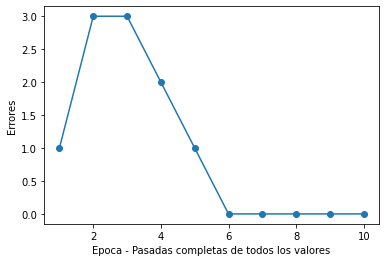

In [56]:
import matplotlib.pyplot as plt
# Haremos un perceptron
ppn = Perceptron(eta=0.1, n_iter=10)
# Calcula los pesos
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epoca - Pasadas completas de todos los valores')
plt.ylabel('Errores')
plt.show()

Esto indica que encontramos los pesos en $6^{eta}$ iteracion, porque ya no hubo camios en los pesos y por lo tanto tuvumos $0$ errores.

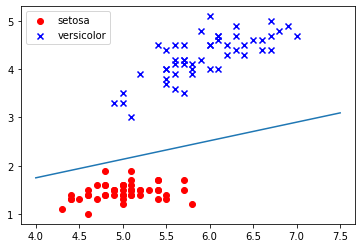

In [60]:
# AL perceptron lo definimos como una recta
# w0 + w1*x1 + w2*x2
# ¿Por que x2? Dada la geometria analitica asociamos x1 =x, x2=y, por lo tanto la ecuacion 
# de la recta se despeja y, para como y = mx + b, por eso se eligiio x2
# x2 = (-w0 - w1*x1) / w2 = -(w0 + w1*x1) / w2

# Con esto podemos trazar un borde de decision, graficamos la recta que se genera de ecuacion de pesos y entradas
x1 = np.linspace(4, 7.5, 2)
x2 = - (ppn.w_[0] + ppn.w_[1] * x1) / ppn.w_[2]
plt.plot(x1,x2)

# Clase setosa
registros = y == -1 # regresa un data frame booleano que contiene solo los valores de -1
x1 = X[registros][:,0]  # Toma columna 0
x2 = X[registros][:,1]  # Toma toda la columna 1
plt.scatter(x1, x2, c='r', marker='o', label='setosa')

# Clase versicolor
registros = y == 1
x1 = X[registros][:,0]  # Toma columna 0
x2 = X[registros][:,1]  # Toma toda la columna 1
plt.scatter(x1, x2, c='b', marker='x', label='versicolor')

plt.legend()
plt.show()

Esta es una forma de reprentar nuestros resultados.
- Trazar la recta de decision
- Colore las clases

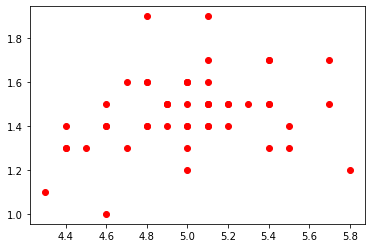

In [77]:
registros = y == -1
x1 = X[registros][:,0]
x2 = X[registros][:,1]
plt.scatter(x1, x2, c='r', marker='o', label='setosa')

Fin del notebook.

---
### Cosa de python

Conceptos de python para entender el codigo de arriba.

In [41]:
# True -> 1
# False -> 0
update = 0.0
int(update != 0.0)

0

In [38]:
# Asignacion por slices
nums = [1,2,3,4,5,6,7,8,9]
print(nums)
print(nums[2:5])

nums[2:5] = [70, 90, 80]
print(nums)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[3, 4, 5]
[1, 2, 70, 90, 80, 6, 7, 8, 9]


In [64]:
# Suma slices
# Asignacion por slices
nums = [1,2,3,4,5,6,7,8,9]
print(nums)
print(nums[2:5])

nums[2:5] += [200, 800, 900]
print(nums)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[3, 4, 5]
[1, 2, 3, 4, 5, 200, 800, 900, 6, 7, 8, 9]


In [68]:
import numpy as np
# Asignacion por slices
nums = np.array([1,2,3,4,5,6,7,8,9])
print(nums)
print(nums[2:5])

nums[2:5] = [70, 90, 80]
print(nums)

[1 2 3 4 5 6 7 8 9]
[3 4 5]
[ 1  2 70 90 80  6  7  8  9]


In [66]:
import numpy as np

# Asignacion por slices numpy
nums = np.array([1,2,3,4,5,6,7,8,9])
print(nums)
print(nums[2:5])

nums[2:5] += [200, 800, 900]
print(nums)

[1 2 3 4 5 6 7 8 9]
[3 4 5]
[  1   2 203 804 905   6   7   8   9]


In [9]:
numbers = [1, 2, 3]
words = ['one', 'two', 'three']
zip_iterator = zip(numbers, words)

for item1, item2 in zip(numbers, words):
    print(f"Item1:{item1} - item2:{item2}")

Item1:1 - item2:one
Item1:2 - item2:two
Item1:3 - item2:three


In [7]:
shopping_tuple = ("chicken", "rice", "curry sauce", "carrots", "milk")

for item in shopping_tuple:
    print(item)

# Este el estilo python para ciclo, no se sita crear indice i para llevar el conteo
for item1, item2 in enumerate(shopping_tuple, start=5):
     print(f"Item1:{item1} - item2:{item2}")

chicken
rice
curry sauce
carrots
milk
Item1:5 - item2:chicken
Item1:6 - item2:rice
Item1:7 - item2:curry sauce
Item1:8 - item2:carrots
Item1:9 - item2:milk


In [2]:
languages = ["java", "python", "c++"]


for i, language in enumerate(languages, 31):
    print(f"i:{i} - element: {language}")

i:31 - element: java
i:32 - element: python
i:33 - element: c++


In [4]:
import numpy as np

In [5]:
np.zeros(1)

array([0.])

### References
- https://stackoverflow.com/questions/14675913/changing-image-size-in-markdown
- https://stackoverflow.com/questions/255170/markdown-and-image-alignment#answer-5054055
- https://stackoverflow.com/questions/4027363/two-statements-next-to-curly-brace-in-an-equation
- https://www.ediciones-eni.com/open/mediabook.aspx?idR=0ae2d1cebd85290a367430c681c6de60

### Peculiaridades de python

In [20]:
numbers = [1, 2, 3]
words = ['one', 'two', 'three']
zip_iterator = zip(numbers, words)


print(zip_iterator)
print(tuple(zip_iterator))
#zip_iterator = zip(numbers, words)
print(list(zip_iterator))

for item1, item2 in zip(numbers, words):
    print(f"Item1:{item1} - item2:{item2}")

((1, 'one'), (2, 'two'), (3, 'three'))
[]
Item1:1 - item2:one
Item1:2 - item2:two
Item1:3 - item2:three
